<a href="https://colab.research.google.com/github/Krisnawm/Python_Tugas/blob/main/Python_11_Dataset%20Daun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
cd /content/drive/MyDrive/Colab_Notebook

/content/drive/MyDrive/Colab_Notebook


In [322]:
ls

3scene/  forest/       Hutan/  modeldaun_scene/  Pantai/
Daun/    Gambar_Test/  Jalan/  nnmodel_scene/


In [323]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [324]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print ("[INFO] loading images...")
imagePaths = paths.list_images("Daun")
data = []
labels = []

[INFO] loading images...


In [325]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it ti 64x64 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
  data.append(image)

  # extract the class lavel from the file path update the
  # labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [326]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [327]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [328]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [329]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(447, 128, 128, 3)
(149, 128, 128, 3)


In [355]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(56, 3,3, activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, 3,3, activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully_connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5,activation='softmax' ))

model1.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 42, 42, 56)        1568      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 21, 21, 56)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 7, 7, 64)          32320     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 100)               57700     
_________________________________________________________________
dense_87 (Dense)             (None, 5)               

In [357]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 71ms/step - loss: 0.3282 - accuracy: 0.8770 - val_loss: 0.6182 - val_accuracy: 0.7718
Epoch 2/25
14/14 [==============================] - 1s 61ms/step - loss: 0.2546 - accuracy: 0.9262 - val_loss: 0.6376 - val_accuracy: 0.7584
Epoch 3/25
14/14 [==============================] - 1s 62ms/step - loss: 0.2415 - accuracy: 0.9351 - val_loss: 0.6562 - val_accuracy: 0.7450
Epoch 4/25
14/14 [==============================] - 1s 60ms/step - loss: 0.2488 - accuracy: 0.9172 - val_loss: 0.6775 - val_accuracy: 0.7919
Epoch 5/25
14/14 [==============================] - 1s 61ms/step - loss: 0.2539 - accuracy: 0.9172 - val_loss: 0.7232 - val_accuracy: 0.7383
Epoch 6/25
14/14 [==============================] - 1s 62ms/step - loss: 0.2422 - accuracy: 0.9060 - val_loss: 0.6631 - val_accuracy: 0.7785
Epoch 7/25
14/14 [==============================] - 1s 61ms/step - loss: 0.1873 - accuracy: 0.9508 - val_loss: 0.6350 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


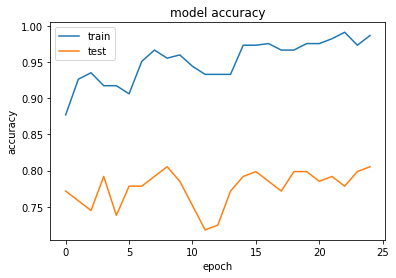

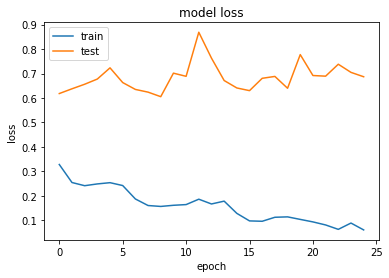

In [358]:
import matplotlib.pyplot as plt

print(H.history.keys())
#summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [359]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_07       0.74      0.74      0.74        27
      GMB_08       0.77      0.83      0.80        29
      GMB_09       0.90      0.84      0.87        32
      GMB_10       0.88      0.81      0.84        26
      GMB_11       0.76      0.80      0.78        35

    accuracy                           0.81       149
   macro avg       0.81      0.80      0.81       149
weighted avg       0.81      0.81      0.81       149



In [360]:
model1.save('modeldaun_scene')

INFO:tensorflow:Assets written to: modeldaun_scene/assets


In [361]:
import cv2
import matplotlib.pyplot as plt
image1='Daun/GMB_07/IMG_20200918_083948.jpg'

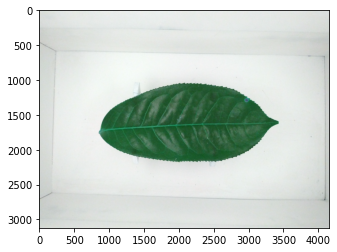

In [362]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [364]:
image_testing = Image.open('Daun/GMB_07/IMG_20200918_083948.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [365]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [366]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9004120e-01 7.9967118e-05 9.6710967e-03 1.3428414e-07 2.0764218e-04]]
['GMB_07']
